In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.keras.utils import to_categorical

# Ведение в нейронные сети

Перед началом вы можете поиграться на этом сайте: https://playground.tensorflow.org/

##Решение задачи XOR (исключающее или)

In [2]:
W = np.array([[1, 1], [1, 1]], dtype=np.float32)
c = np.array([0, -1])
w = [1, -2]

Матрица X содержит все точки в пространтсве двоичных входов, по одному примеру в строке.

In [3]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

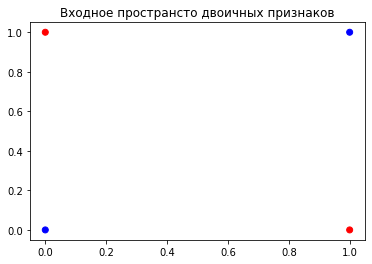

In [4]:
plt.scatter(X[:, 0], X[:,1], c=["b", "r", "r", "b"])
plt.title("Входное пространсто двоичных признаков");

Первый шаг нейронной сети - умножения матрицы входов на матрицу весов первого слоя.

In [5]:
XW = np.dot(X, W)
XW

array([[0., 0.],
       [1., 1.],
       [1., 1.],
       [2., 2.]])

Затем прибавления вектора смещения.

In [6]:
XW_plus_c = XW + c
XW_plus_c

array([[ 0., -1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 2.,  1.]])

В этом пространстве все примеры расположены на прямой с угловым коофицентов 1. При этом движение вдоль этой прямой выход вначале должен быть равен 0, затем подниматься до 1, потом снова падает до 0. Линейная модель такую функцию реализовать не может. Что бы завершить вычисление для каждого примера, применяем преобразование линейной ректификации (ReLU). 

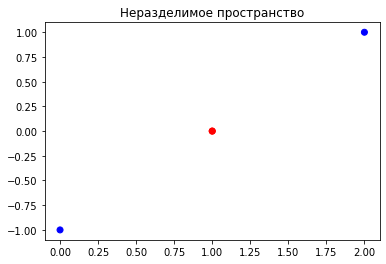

In [7]:
plt.scatter(XW_plus_c[:, 0],
            XW_plus_c[:, 1],
            c=["b", "r", "r", "b"])
plt.title("Неразделимое пространство");

Важное замечание: Помните мы изучали фильтры? В нейронных сетях промежуточные слои делают то же самое что и фильтры в ядерных моделях (переносят признаки в линейное пространство, для классификации).

In [8]:
import typing

def ReLU(X: np.ndarray):
  """
  Блок линейной ректификации
  X: Входной признак
  """
  return [x if x >= 0 else 0 for x in X]

Тепер классы линейно разделимы.

In [9]:
h = np.array([ReLU(vec) for vec in XW_plus_c])
h

array([[0., 0.],
       [1., 0.],
       [1., 0.],
       [2., 1.]])

Это преобразование изменило соотношение между примерами. Они больше не лежат на одной прямой.

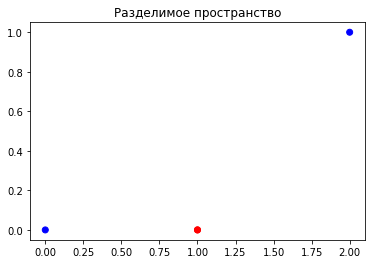

In [10]:
plt.scatter(h[:, 0],
            h[:, 1],
            c=["b", "r", "r", "b"])
plt.title("Разделимое пространство");

В завершение умножаем на последний слой.

In [11]:
np.dot(h, w)

array([0., 1., 1., 0.])

## Нейронные сети в Tensorflow

Пожалуй в этих практических будем использовать tensorflow. Это библиотека от гугл позовляющяя обучать нейронные сети с использование GPU.

In [12]:
# Объявляем объект модели
model = tf.keras.models.Sequential()

# Последовательно добавляем слои в нашу модель
model.add(tf.keras.layers.Input(shape=[2]))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(1))

Dense (переводится как плотный). Каждый нейрон соединён с каждым предыдущим нейроном предыдущего слоя.

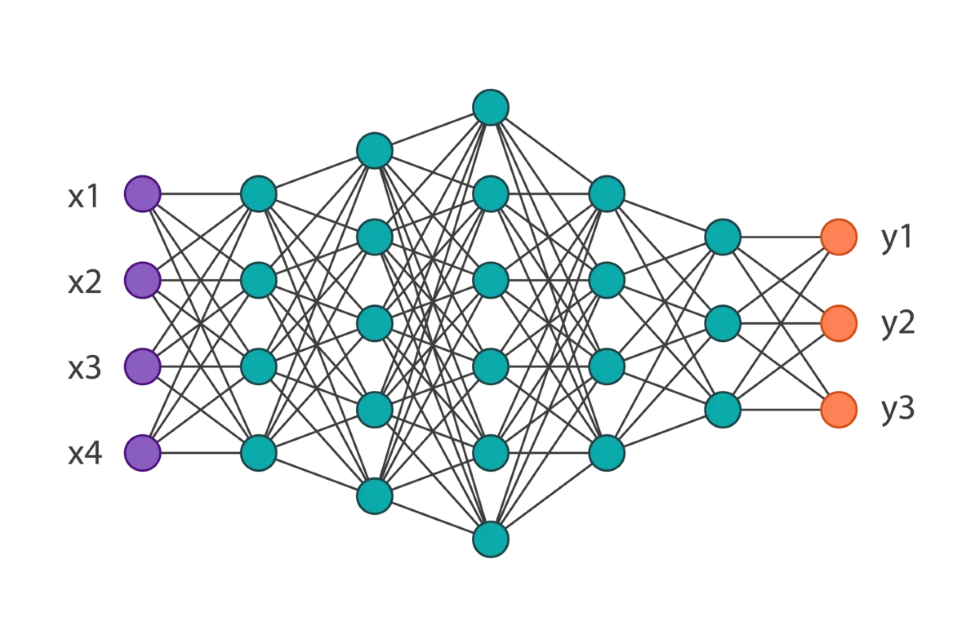

Класс Sequential (переводится как последовательный). Это один из способов создать модель. Его часто используют для самых простых моделей т.к в таких сетях данные распространяются прямо.

Метод для вывода подробной информации о слоях модели

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [14]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [15]:
y = np.array([[0], [1], [1], [0]])
y

array([[0],
       [1],
       [1],
       [0]])

Перед тем как начать тренировку нейронной сети нужно её скомпилировать. Это значит запустить соответсвующий метод compile. В нём нужно указать оптимизатор, функции потери и метрики за которыми мы будем наблюдать в процессе обучения.

In [16]:
model.compile(optimizer="rmsprop", loss="BinaryCrossentropy", metrics=["acc"])

In [17]:
model.fit(X,
          y,
          epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 838ms/step - loss: 4.0703 - acc: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0658 - acc: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 4.0627 - acc: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 4.0602 - acc: 0.7500
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 4.0581 - acc: 0.7500
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 4.0562 - acc: 0.7500
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 4.0545 - acc: 0.7500
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 4.0529 - acc: 0.7500
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 4.0514 - acc: 0.7500
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 4.0500 - acc: 0.7500
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 

In [18]:
model.get_weights()

[array([[-0.45829386,  0.7973477 ],
        [-0.6754628 , -0.9546149 ]], dtype=float32),
 array([0.02704801, 0.02529314], dtype=float32),
 array([[-0.12475352],
        [-0.78285325]], dtype=float32),
 array([-0.0256337], dtype=float32)]

Как видно модель не сошлась :(, да еще и ответы её странные!

In [ ]:
model.predict(X)

array([[0.14363766],
       [0.40042388],
       [0.37906152],
       [0.6358477 ]], dtype=float32)

Это всё из-за того что мы не указали функции активации. Функции активации нужны для того что бы проводить нелинейные преобразования.

In [ ]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=[2]),
     tf.keras.layers.Dense(2, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")]
)

In [ ]:
model.compile(optimizer="adam", loss="BinaryCrossentropy", metrics=["acc"])

In [ ]:
tf.random.set_seed(42)

model.fit(X,
          y,
          epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 0.8165 - acc: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 22ms/step - loss: 0.8160 - acc: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 19ms/step - loss: 0.8154 - acc: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 0.8149 - acc: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 0.8143 - acc: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 0.8137 - acc: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 10ms/step - loss: 0.8132 - acc: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.8126 - acc: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 21ms/step - loss: 0.8121 - acc: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 0.8115 - acc: 0.5000
Epoch 11/300
1/1 [==============================] - 0s 9ms/step - loss: 0.

In [ ]:
np.around(model.predict(X))

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

Модель обучается итерациями, поэтому так много епох. 1 эпоха - полный проход по всему обучающему набору данных.

Так же есть возможность в увеличении количества нейронов и слоёв в сети. Это увеличит ёмкость модели, и подтолкнёт её к переобучению (модель просто заучит данные из-за того что у неё очень много нейронов).

## Нейронные сеть в компьютерном зрении

Возможно для многих будет открытие, то что картинка это матрица. Поэтому отдав нашей модели эту матрицу можно ли определить что там на этой бездушной и непонятной для человека матрице? Конечно можно! Сейчас мы в этом убедимся.

Загрузим данные

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Форма обучающего тензора {X_train.shape}")
print(f"Количество обучающий примеров {X_train.shape[0]}")
print(f"Разрешение одного образца {X_train.shape[1:]}")

print("\n")

print(f"Форма тестового тензора {X_test.shape}")
print(f"Количество тестовых примеров {X_test.shape[0]}")
print(f"Разрешение одного образца {X_test.shape[1:]}")

Форма обучающего тензора (60000, 28, 28)
Количество обучающий примеров 60000
Разрешение одного образца (28, 28)


Форма тестового тензора (10000, 28, 28)
Количество тестовых примеров 10000
Разрешение одного образца (28, 28)


Преобразуем в такое представление. Это показывает что у нас картинка содержит 1 канал (градация серого) а не 3 (RGB).

In [ ]:
np.expand_dims(X_train[0], -1).shape

(28, 28, 1)

Сейчас у нас есть вектор таргетов. Но наша модель выполняет задачу классификации не регрессии (она прогнозирует вероятность пренадлежности текущего примера к каждому классу, поэтому это не одно число). Это означает что на выходе у нас будет вектор вероятностей.

In [ ]:
to_categorical(5, num_classes=10)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Заметим что я делю а 255. Это называется нормализацией и является отличным методом борьбы с перенасыщением функции активации. Теперь каждый пиксель это не просто цифра от 0 до 255 а от 0 до 1.

In [ ]:
X_train = (np.expand_dims(X_train, -1) / 255)
X_test = (np.expand_dims(X_test, -1) / 255)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

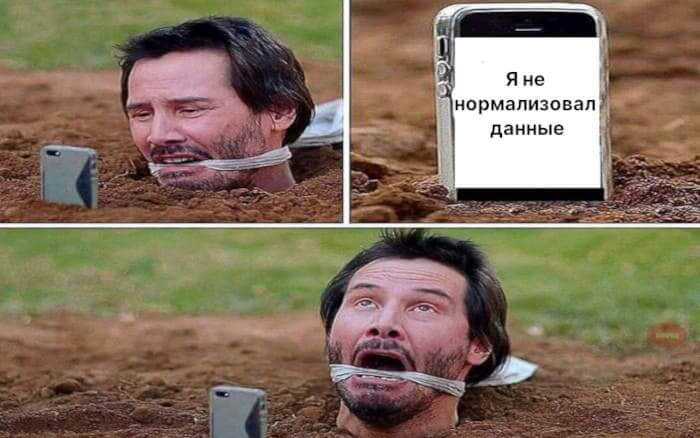

Размер обучающего набора

In [ ]:
print(len(X_train))
print(len(y_train))

60000
60000


Размер тестового набора

In [ ]:
print(len(X_test))
print(len(y_test))

10000
10000


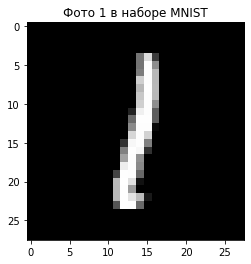

In [ ]:
i = np.random.randint(0, len(X_train))

plt.imshow(np.reshape(X_train[i], [28, 28]),
           cmap="gray")
plt.title(f"Фото {np.argmax(y_train[i])} в наборе MNIST");

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input([28, 28, 1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 150)               45150     
                                                                 
 dense_6 (Dense)             (None, 10)                1510      
                                                                 
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss="CategoricalCrossentropy", metrics=["acc"])

Нам нужен еще один набор. Он называет проверочный или validation. Он отличается от теста тем что он берётся из обучающего набора и проверяем (не обучаем на нём) мы его после каждой эпохи. Это набор позволяет хорошо оценивать степень переобучение. Если метрика на тренировочном растёт а на проверочном падает, то это значит что модель начинает переобучаться.

In [ ]:
model.fit(X_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2228 - acc: 0.9340 - val_loss: 0.1093 - val_acc: 0.9675
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0904 - acc: 0.9722 - val_loss: 0.1012 - val_acc: 0.9703
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0615 - acc: 0.9803 - val_loss: 0.0988 - val_acc: 0.9723
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0459 - acc: 0.9848 - val_loss: 0.0871 - val_acc: 0.9762
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0344 - acc: 0.9884 - val_loss: 0.0945 - val_acc: 0.9753
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0289 - acc: 0.9901 - val_loss: 0.0900 - val_acc: 0.9762
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0255 - acc: 0.9915 - val_loss: 0.0999 - val_acc: 0.9747
Epoch 8/10
1500/1500 [==============================] - 6s 4ms

Модель вышла на 98% точность на новых данных. Это говорит о том, что модель не переобучилась. Далее по практическим мы расмотрим более эфективные модели работающие с такими неструктурированными данными.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1063 - acc: 0.9765


[0.10629940032958984, 0.9764999747276306]

Наверное вы заметили что обучение можно было прекратить заранее. Когда перестаёт расти (растёт ооооочень медленно) точность на проверочных данных.

Сейчас стоит обсудить то, что такое loss, acc, val_loss, val_acc.

loss - значение функции потерь. val_loss - значение функции потерь на проверочных данных. С помощью оптимизатора мы уменьшаем loss. Уменьшение 